Analysing the stackoverflow survey of 2020
with focus on women.
- How many people identified as women?
- Where do these women live?
- What is their education and job?
- What is the most common job of these women?
- What are important aspects for women? Job satisfaction?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [2]:
df_sof = pd.read_csv('survey_results_public.csv')
df_sof.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
schema = pd.read_csv('survey_results_schema.csv')
col_names = list(df_sof.columns)
col_names

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

1. Question: How does the data look like?

In [4]:
num_cols = df_sof.shape[1]
print('columns:', num_cols)
num_rows = df_sof.shape[0]
print('rows:', num_rows)
no_nulls = set(df_sof.columns[df_sof.isnull().mean()==0])
print('columns without missing data:', no_nulls)
most_missing_cols = set(df_sof.columns[df_sof.isnull().mean() > 0.46])
print('columns with most missing data (46%):', most_missing_cols)

columns: 61
rows: 64461
columns without missing data: {'Respondent'}
columns with most missing data (46%): {'ConvertedComp'}


2. Question:
    - How many people identified as female in the survey?
    - What is the percentage of overall answers?

In [95]:
# What are the possible combinations of answers?
gender_counts = df_sof['Gender'].value_counts()
gender_counts

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

In [6]:
# percentage of people who stated their gender identification
df_sof['Gender'].dropna().shape[0]/df_sof.shape[0]

0.7843036875009696

There are people that only identify as woman, but there are also people that identify as more than just woman. I want to take them into account as well.

In [7]:
# help function for counting
def total_count(df, col1, col2, look_for):
    """
    INPUT
        df - pandas dataframe with the data holding the necessary columns
            col1 - string - the column of interest in df
            col2 - string - the counting column for col1
    OUTPUT
        new_df - pandas dataframe - holding the data of col1 and col2
    """
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])

    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

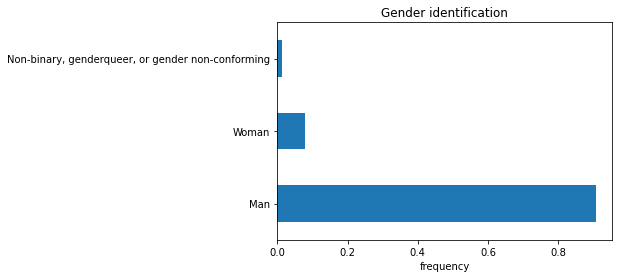

In [91]:
possible_val = ["Man", "Woman",
                 "Non-binary, genderqueer, or gender non-conforming",]

def clean_and_plot(df, possible_values, interest_col='Gender', output_col='identification',
                   title='Gender identification', plot=True):
    """
    INPUT
        df - pandas dataframe with the data holding the necessary columns
        interest_col - string - column of interest in df
        output_col - string - new name to sum up the results of interest_col
        possible_values - list of possible values which are found in the interest_column
        title - string - title of the output plot
        plot - boolean - creation of a corresponding plot
    OUTPUT
        props_interest_df - pandas dataframe with the frequencies of each interest
    """
    interest = df[interest_col].value_counts().reset_index()
    interest.rename(columns={'index': output_col, interest_col: 'count'}, inplace=True)
    interest_df = total_count(interest, output_col, 'count', possible_values)

    interest_df.set_index(output_col, inplace=True)
    if plot:
        (interest_df/interest_df.sum()).plot(kind='barh', legend=None);
        plt.title(title);
        plt.ylabel("");
        plt.xlabel('frequency')
        # plt.savefig("jobs.png", bbox_inches='tight')
        plt.show()
    props_interest_df = interest_df/interest_df.sum()
    return props_interest_df

props_df = clean_and_plot(df_sof, possible_val, plot=True)

In [9]:
props_df

,count
identification,
Man,0.908405
Woman,0.079335
"Non-binary, genderqueer, or gender non-conforming",0.012260


In [10]:
def woman_col(gender_col):
    """
    INPUT
        gender_col - column of interest
    OUTPUT
        0/1 - depending of the value in gender_col is in gender_woman
    """
    gender_woman = ["Woman", "Woman;Non-binary, genderqueer, or gender non-conforming", "Woman;Man",
                    "Woman;Man;Non-binary, genderqueer, or gender non-conforming"]
    if gender_col in gender_woman:
        return 1
    else:
        return 0

In [11]:
df_sof['Woman'] = df_sof['Gender'].apply(woman_col)
df_woman = df_sof[df_sof['Woman'] == 1]

3. Question: How are these women?
    - Where do they live?
    - How old are they?
    - What is their educational background?
    - What jobs do they have?
    - How long have they been coding?

In [12]:
df_woman['Country'].value_counts()/df_woman.shape[0]

United States          0.282566
India                  0.098068
United Kingdom         0.082219
Germany                0.048044
Canada                 0.046062
                         ...   
Somalia                0.000248
Oman                   0.000248
Cyprus                 0.000248
Uzbekistan             0.000248
Republic of Moldova    0.000248
Name: Country, Length: 124, dtype: float64

The woman in this survey live in 124 countries. About a quarter of them live in the US. 

The EU is one of the largest economies. Thus, summing it to the US up would be interesting.

In [97]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
                'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
                'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
                'Sweden', 'United Kingdom']
def economies(df, old_col, new_col, plot=True):
    """
    INPUT
        df - pandas dataframe with the data holding the necessary columns
        old_col - string - input column in df
        new_col - string - column name of the new column summing of all EU countries into one entity
        plot - boolean - creation of a corresponding plot
    OUTPUT
        bar-plot - if plot == true
        props_eco - pandas dataframe with the frequencies of each economy
    """
    tmp_df = df.reset_index()
    for idx in range(tmp_df.shape[0]):
        if tmp_df.loc[idx, old_col] in eu_countries:
            tmp_df.loc[idx, new_col] = 'EU'
        else:
            tmp_df.loc[idx, new_col] = tmp_df.loc[idx, old_col]
    eco_counts = tmp_df[new_col].value_counts()
    if plot:
        (eco_counts/eco_counts.sum()).plot(kind='barh', legend=None);
        plt.title(new_col);
        plt.show()
    prop_eco = eco_counts/eco_counts.sum()
    return prop_eco

economies(df_woman, 'Country', 'Economies', plot=False)


EU                     0.300644
United States          0.282566
India                  0.098068
Canada                 0.046062
Australia              0.023031
                         ...   
Ghana                  0.000248
Somalia                0.000248
Oman                   0.000248
Uzbekistan             0.000248
Republic of Moldova    0.000248
Name: Economies, Length: 98, dtype: float64

In [14]:
#People could enter their exact age and for clarity the use of groups is necessary.
age_groups = ['< 11', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '>70']

def age_grouping(df, col1, plot=True):
    """
    INPUT
        df - pandas dataframe with the data holding the necessary columns
        col1 - string - column of interest in df
        plot - boolean - creation of a corresponding plot
    OUTPUT
        bar-plot - if plot == true
        props_new_df - pandas dataframe with the frequencies of each age group
    """
    tmp_df = df.reset_index()
    new_df = defaultdict(int)
    for idx in range(tmp_df.shape[0]):
        if tmp_df.loc[idx, col1] < 10:
            new_df[age_groups[0]] += 1
        elif 21 > tmp_df.loc[idx, col1] > 10:
            new_df[age_groups[1]] += 1
        elif 31 > tmp_df.loc[idx, col1] > 20:
            new_df[age_groups[2]] += 1
        elif 41 > tmp_df.loc[idx, col1] > 30:
            new_df[age_groups[3]] += 1
        elif 51 > tmp_df.loc[idx, col1] > 40:
            new_df[age_groups[4]] += 1
        elif 61 > tmp_df.loc[idx, col1] > 50:
            new_df[age_groups[5]] += 1
        elif 71 > tmp_df.loc[idx, col1] > 60:
            new_df[age_groups[6]] += 1
        elif tmp_df.loc[idx, col1] > 70:
            new_df[age_groups[7]] += 1
        else:
            continue
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = ['Age group', 'count']
    new_df.sort_values('count', ascending=False, inplace=True)
    new_df.set_index('Age group', inplace=True)
    if plot:
        (new_df/new_df.sum()).plot(kind='barh', legend=None);
        plt.title('Age Group distribution');
        plt.xlabel('frequency')
        plt.show()
    prop_new_df = new_df/new_df.sum()
    return prop_new_df

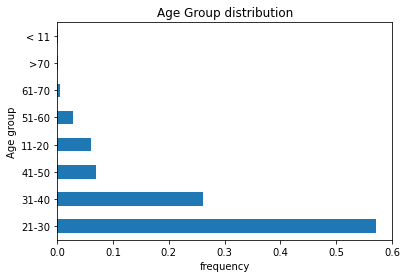

,count
Age group,
21-30,0.571717
31-40,0.262049
41-50,0.069264
11-20,0.060029
51-60,0.028571
61-70,0.005483
>70,0.002020
< 11,0.000866


In [15]:
age_grouping(df_woman, 'Age')

More than 50% of all women are in the age group of 21-30. The second group are women in the age group of 31-40 (26%).

In [16]:
# female education
woman_ed = df_woman['EdLevel'].value_counts()
woman_ed/woman_ed.sum()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.513617
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.247391
Some college/university study without earning a degree                                0.090863
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.058539
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.038941
Associate degree (A.A., A.S., etc.)                                                   0.026979
Professional degree (JD, MD, etc.)                                                    0.011199
Primary/elementary school                                                             0.006617
I never completed any formal education                                                0.005854
Name: EdLevel, dtype: float64

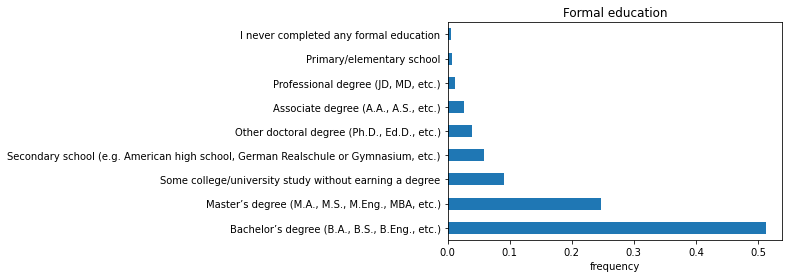

In [83]:
(woman_ed/woman_ed.sum()).plot(kind='barh');
plt.xlabel('frequency');
plt.title('Formal education')

Most woman in the survey have a bachelor's degree as their highest level of education, followed by a Master's degree.

In [18]:
woman_emp = df_woman['Employment'].value_counts()
woman_emp/woman_emp.sum()

Employed full-time                                      0.712004
Student                                                 0.121787
Independent contractor, freelancer, or self-employed    0.060893
Not employed, but looking for work                      0.050162
Employed part-time                                      0.046169
Not employed, and not looking for work                  0.004991
Retired                                                 0.003993
Name: Employment, dtype: float64

Text(0.5, 0, 'frequency')

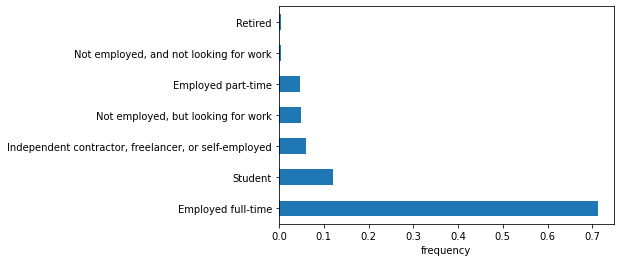

In [19]:
(woman_emp/woman_emp.sum()).plot(kind='barh');
plt.xlabel('frequency')

Most woman in the survey work full-time, but it is worth looking at the employement distribution by age group.

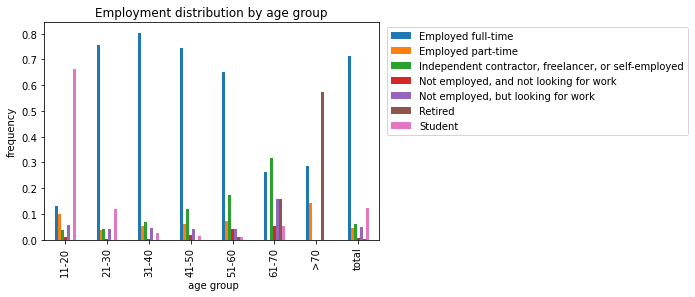

In [87]:
def age_empl(df, col1, col2, col3, total=True, plot=True, title=None):
    """
    INPUT
        df - pandas dataframe with the data holding the necessary columns
        col1 - string - original column of the age in df
        col2 - string - new column for the age groups
        col3 - string - column of interest in df
        total - boolean - adding a group for the total to the output plot
        plot - boolean - plotting the barchart
    OUTPUT
        grouped bar-plot - if plot == true
    """
    tmp_df = df.reset_index()
    for idx in range(tmp_df.shape[0]):
        if tmp_df.loc[idx, col1] < 10:
            continue
            #tmp_df.loc[idx, col2] = age_groups[0]
        elif 21 > tmp_df.loc[idx, col1] > 10:
            tmp_df.loc[idx, col2] = age_groups[1]
        elif 31 > tmp_df.loc[idx, col1] > 20:
            tmp_df.loc[idx, col2] = age_groups[2]
        elif 41 > tmp_df.loc[idx, col1] > 30:
            tmp_df.loc[idx, col2] = age_groups[3]
        elif 51 > tmp_df.loc[idx, col1] > 40:
            tmp_df.loc[idx, col2] = age_groups[4]
        elif 61 > tmp_df.loc[idx, col1] > 50:
            tmp_df.loc[idx, col2] = age_groups[5]
        elif 71 > tmp_df.loc[idx, col1] > 60:
            tmp_df.loc[idx, col2] = age_groups[6]
        elif tmp_df.loc[idx, col1] > 70:
            tmp_df.loc[idx, col2] = age_groups[7]
        else:
            continue
    if total:
        col3_total = 'total'
        tmp_df = tmp_df.rename({col3: col3_total}, axis='columns')
        df_emp = tmp_df.groupby(col2)[col3_total].value_counts(normalize=True).unstack(fill_value=0)
        df_emp = df_emp.append(tmp_df[col3_total].value_counts(normalize=True))
    else:
        df_emp = tmp_df[col3].value_counts()
    df_emp.plot(kind='bar')
    plt.ylabel('frequency')
    plt.xlabel(' age group')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.01, 1))
    # plt.savefig("education_per_age.png", bbox_inches='tight')
    plt.show()

age_empl(df_woman, 'Age', 'AgeGroup', 'Employment', total=True, title='Employment distribution by age group')

Computer science, computer engineering, or software engineering                   0.526609
Information systems, information technology, or system administration             0.073837
A natural science (such as biology, chemistry, physics, etc.)                     0.066314
Another engineering discipline (such as civil, electrical, mechanical, etc.)      0.063527
A humanities discipline (such as literature, history, philosophy, etc.)           0.056562
A social science (such as anthropology, psychology, political science, etc.)      0.048481
Mathematics or statistics                                                         0.045974
Web development or web design                                                     0.038172
Fine arts or performing arts (such as graphic design, music, studio art, etc.)    0.032321
A business discipline (such as accounting, finance, marketing, etc.)              0.027027
A health science (such as nursing, pharmacy, radiology, etc.)                     0.012817

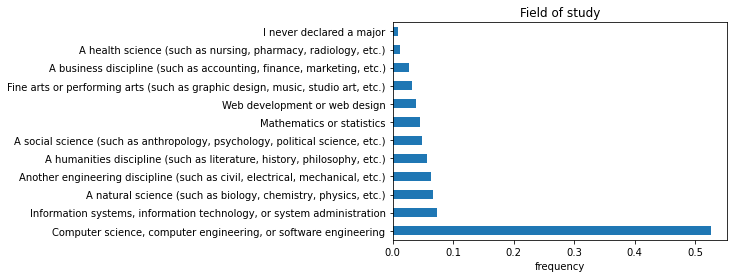

In [82]:
#field of major
woman_major = df_woman['UndergradMajor'].value_counts()
(woman_major/woman_major.sum()).plot(kind='barh');
plt.xlabel('frequency');
plt.title('Field of study')
(woman_major/woman_major.sum())

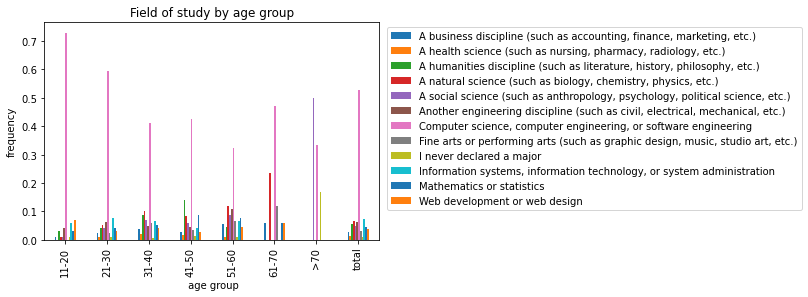

In [88]:
#major distribution by age group
age_empl(df_woman, 'Age', 'AgeGroup', 'UndergradMajor', total=True, plot=True, title='Field of study by age group')

In [23]:
# similar to the age, the years of coding need groups.
coding_groups = [' 0-5', ' 5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50 and more']

def coding_grouping(df, col1, plot=True):
    """
    INPUT
        df - pandas dataframe with the data holding the necessary columns
        col1 - string - column of interest in df
        plot - boolean - creation of a corresponding plot
    OUTPUT
        props_new_df - pandas dataframe with the frequencies of each coding group
    """
    tmp_df = df[col1].dropna()
    tmp_df = tmp_df.reset_index()

    new_df = defaultdict(int)
    for idx in range(tmp_df.shape[0]):
        if tmp_df.loc[idx, col1] == 'Less than 1 year':
            new_df[coding_groups[0]] += 1
        elif tmp_df.loc[idx, col1] == 'More than 50 years':
            new_df[coding_groups[10]] += 1
        elif int(tmp_df.loc[idx, col1]) < 5:
            new_df[coding_groups[0]] += 1
        elif 10 > int(tmp_df.loc[idx, col1]) > 4:
            new_df[coding_groups[1]] += 1
        elif 15 > int(tmp_df.loc[idx, col1]) > 9:
            new_df[coding_groups[2]] += 1
        elif 20 > int(tmp_df.loc[idx, col1]) > 14:
            new_df[coding_groups[3]] += 1
        elif 25 > int(tmp_df.loc[idx, col1]) > 19:
            new_df[coding_groups[4]] += 1
        elif 30 > int(tmp_df.loc[idx, col1]) > 24:
            new_df[coding_groups[5]] += 1
        elif 35 > int(tmp_df.loc[idx, col1]) > 29:
            new_df[coding_groups[6]] += 1
        elif 40 > int(tmp_df.loc[idx, col1]) > 34:
            new_df[coding_groups[7]] += 1
        elif 45 > int(tmp_df.loc[idx, col1]) > 39:
            new_df[coding_groups[8]] += 1
        elif 50 > int(tmp_df.loc[idx, col1]) > 44:
            new_df[coding_groups[9]] += 1
        elif int(tmp_df.loc[idx, col1]) > 49:
            new_df[coding_groups[10]] += 1
        else:
            continue
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = ['coding years', 'count']
    new_df.sort_values('count', ascending=False, inplace=True)
    new_df.set_index('coding years', inplace=True)
    if plot:
        (new_df/new_df.sum()).plot(kind='barh', legend=None);
        plt.title('Coding Years distribution');
        plt.xlabel('frequency');
        plt.show()
    prop_new_df = new_df/new_df.sum()
    return prop_new_df

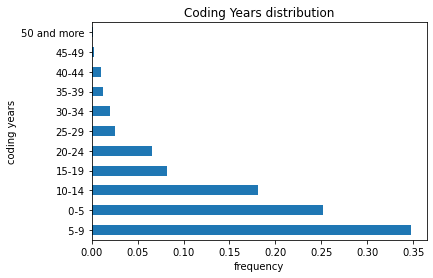

,count
coding years,
5-9,0.347257
0-5,0.251384
10-14,0.181429
15-19,0.082285
20-24,0.065677
25-29,0.025415
30-34,0.020131
35-39,0.012582
40-44,0.009814


In [24]:
coding_grouping(df_woman, 'YearsCode')

In [89]:
# years of coding by age group
def coding_age(df, col1, col2, col3, col4, title='Years of Coding'):
    """
    INPUT
        df - pandas dataframe with the data holding the necessary columns
        col1 - string - column of the original age data in df
        col2 - string - column for the age group data derived from col1
        col3 - string - column with the data of interest in df
        col4 - string - column for the total of col3
        title - string - title of the output plot
    OUTPUT
        grouped bar-plot - plot with the col3 data grouped by col2 with the addition of the col4 data
    """
    tmp_df = df[df[col3].notna()]
    tmp_df = tmp_df.reset_index()
    for idx in range(tmp_df.shape[0]):
        if tmp_df.loc[idx, col1] < 10:
            # left out this age group, because the two answers state elsewhere that they are working full-time
            #tmp_df.loc[idx, col2] = age_groups[0]
            continue
        elif 21 > tmp_df.loc[idx, col1] > 10:
            tmp_df.loc[idx, col2] = age_groups[1]
        elif 31 > tmp_df.loc[idx, col1] > 20:
            tmp_df.loc[idx, col2] = age_groups[2]
        elif 41 > tmp_df.loc[idx, col1] > 30:
            tmp_df.loc[idx, col2] = age_groups[3]
        elif 51 > tmp_df.loc[idx, col1] > 40:
            tmp_df.loc[idx, col2] = age_groups[4]
        elif 61 > tmp_df.loc[idx, col1] > 50:
            tmp_df.loc[idx, col2] = age_groups[5]
        elif 71 > tmp_df.loc[idx, col1] > 60:
            tmp_df.loc[idx, col2] = age_groups[6]
        elif tmp_df.loc[idx, col1] > 70:
            tmp_df.loc[idx, col2] = age_groups[7]
        else:
            continue
    for idx in range(tmp_df.shape[0]):
        if tmp_df.loc[idx, col3] == 'Less than 1 year':
            tmp_df.loc[idx, col4] = coding_groups[0]
        elif tmp_df.loc[idx, col3] == 'More than 50 years':
            tmp_df.loc[idx, col4] = coding_groups[10]
        elif int(tmp_df.loc[idx, col3]) < 5:
            tmp_df.loc[idx, col4] = coding_groups[0]
        elif 10 > int(tmp_df.loc[idx, col3]) > 4:
            tmp_df.loc[idx, col4] = coding_groups[1]
        elif 15 > int(tmp_df.loc[idx, col3]) > 9:
            tmp_df.loc[idx, col4] = coding_groups[2]
        elif 20 > int(tmp_df.loc[idx, col3]) > 14:
            tmp_df.loc[idx, col4] = coding_groups[3]
        elif 25 > int(tmp_df.loc[idx, col3]) > 19:
            tmp_df.loc[idx, col4] = coding_groups[4]
        elif 30 > int(tmp_df.loc[idx, col3]) > 24:
            tmp_df.loc[idx, col4] = coding_groups[5]
        elif 35 > int(tmp_df.loc[idx, col3]) > 29:
            tmp_df.loc[idx, col4] = coding_groups[6]
        elif 40 > int(tmp_df.loc[idx, col3]) > 34:
            tmp_df.loc[idx, col4] = coding_groups[7]
        elif 45 > int(tmp_df.loc[idx, col3]) > 39:
            tmp_df.loc[idx, col4] = coding_groups[8]
        elif 50 > int(tmp_df.loc[idx, col3]) > 44:
            tmp_df.loc[idx, col4] = coding_groups[9]
        elif int(tmp_df.loc[idx, col3]) > 49:
            tmp_df.loc[idx, col4] = coding_groups[10]
        else:
            continue

    df_emp = tmp_df.groupby(col2)[col4].value_counts(normalize=True).unstack(fill_value=0)
    df_emp = df_emp.append(tmp_df[col4].value_counts(normalize=True))
    df_emp.plot(kind='bar')
    plt.title(title)
    plt.ylabel('frequency')
    plt.legend(bbox_to_anchor=(1.05, 1))

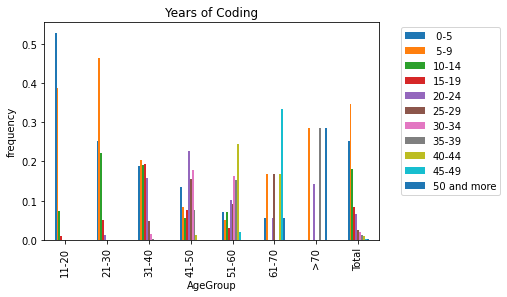

In [90]:
coding_age(df_woman, 'Age', 'AgeGroup', 'YearsCode', 'Total')

Most woman who answered this part of the survey stated that they only have up to 15 years of coding experience.

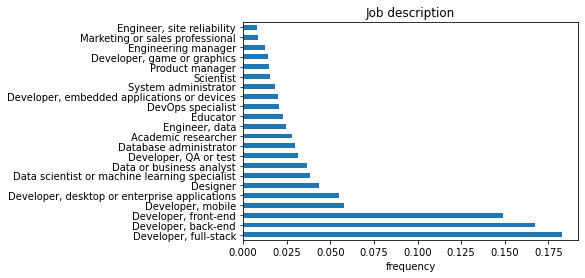

,count
Job,
"Developer, full-stack",0.182706
"Developer, back-end",0.167412
"Developer, front-end",0.149176
"Developer, mobile",0.057765
"Developer, desktop or enterprise applications",0.054706
Designer,0.043412
Data scientist or machine learning specialist,0.038588
Data or business analyst,0.036471
"Developer, QA or test",0.031412


In [92]:
# people could state multiple jobs, which need to be extracted to find the most chosen ones.
possible_jobs = ['Academic researcher', "Data or business analyst", "Data scientist or machine learning specialist",
                 'Database administrator', 'Designer', 'Developer, back-end',
                 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices',
                 'Developer, front-end', 'Developer, full-stack', 'Developer, game or graphics', 'Developer, mobile',
                 'Developer, QA or test', 'DevOps specialist', 'Educator', 'Engineer, data',
                 'Engineer, site reliability', 'Engineering manager', 'Marketing or sales professional',
                 'Product manager', 'Scientist', 'Senior Executive (C-Suite, VP, etc.)', 'System administrator',
                 'Other']

clean_and_plot(df_woman, possible_jobs, 'DevType', 'Job', title='Job description')

In [28]:
# sum up of the top 5 developer jobs.
woman_jobs = clean_and_plot(df_woman, possible_jobs, 'DevType', 'Job', title='Job description', plot=False)
woman_jobs['count'][0:5].sum()

0.611764705882353

In [29]:
#Identification as a developer or relationship to coding.
df_main =df_woman['MainBranch'].value_counts()
df_main/df_main.sum()

I am a developer by profession                                                   0.711797
I am a student who is learning to code                                           0.146341
I am not primarily a developer, but I write code sometimes as part of my work    0.092334
I code primarily as a hobby                                                      0.026132
I used to be a developer by profession, but no longer am                         0.023395
Name: MainBranch, dtype: float64

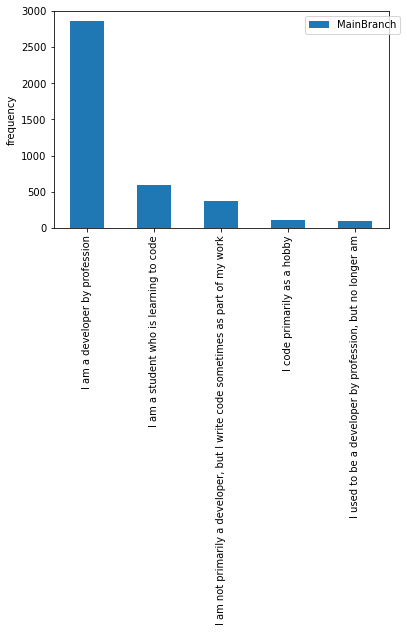

In [30]:
age_empl(df_woman, 'Age', 'AgeGroup', 'MainBranch', total=False)

More than 2/3 of all woman in the survey state that they are developers by profession.

In [31]:
# Job satisfaction
woman_sat = df_woman['JobSat'].value_counts()
woman_sat/woman_sat.sum()

Very satisfied                        0.350773
Slightly satisfied                    0.299441
Slightly dissatisfied                 0.162883
Neither satisfied nor dissatisfied    0.110234
Very dissatisfied                     0.076670
Name: JobSat, dtype: float64

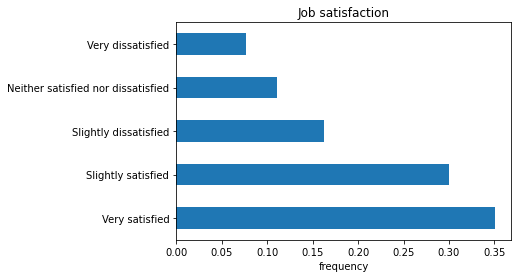

In [93]:
(woman_sat/woman_sat.sum()).plot(kind='barh')
plt.title('Job satisfaction');
plt.xlabel('frequency')

More than 60% of all woman are satisfied with their job and more than a third are very satisfied with their job.

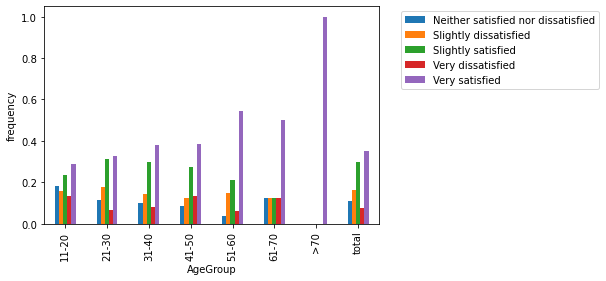

In [33]:
# Job satisfaction by age group.
age_empl(df_woman, 'Age', 'AgeGroup', 'JobSat')

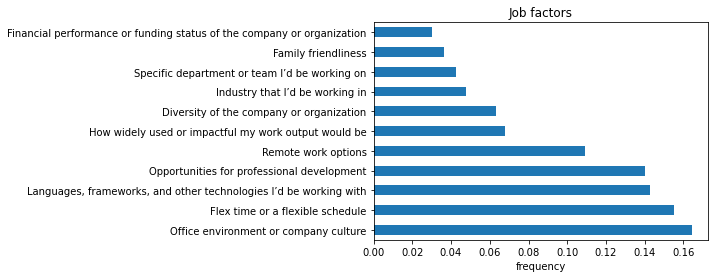

,count
Factor,
Office environment or company culture,0.164638
Flex time or a flexible schedule,0.155322
"Languages, frameworks, and other technologies I’d be working with",0.142501
Opportunities for professional development,0.140011
Remote work options,0.109020
How widely used or impactful my work output would be,0.067607
Diversity of the company or organization,0.063457
Industry that I’d be working in,0.047869
Specific department or team I’d be working on,0.042704


In [94]:
# Job factors
possible_factors = ['Remote work options', 'Office environment or company culture',
                    'Financial performance or funding status of the company or organization',
                    'Opportunities for professional development', 'Diversity of the company or organization',
                    'How widely used or impactful my work output would be', 'Industry that I’d be working in',
                    'Specific department or team I’d be working on', 'Flex time or a flexible schedule',
                    'Languages, frameworks, and other technologies I’d be working with', 'Family friendliness']

clean_and_plot(df_woman, possible_factors, 'JobFactors', 'Factor', 'Job factors')

The most important factor for woman is the 'Office environment or company culture', followed by 'Flex time or a
flexible schedule' and 'Languages, frameworks, and other technologies I’d be working with'

In [35]:
# female professional developers
df_woman_pro = df_woman[df_woman['MainBranch'] == 'I am a developer by profession']

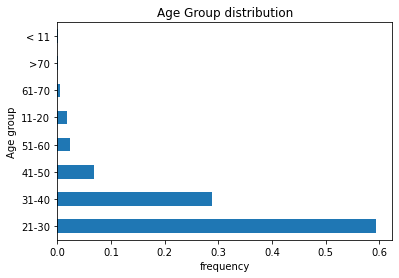

,count
Age group,
21-30,0.593935
31-40,0.288696
41-50,0.068925
51-60,0.023237
11-20,0.018511
61-70,0.004726
>70,0.001575
< 11,0.000394


In [36]:
age_grouping(df_woman_pro, 'Age')

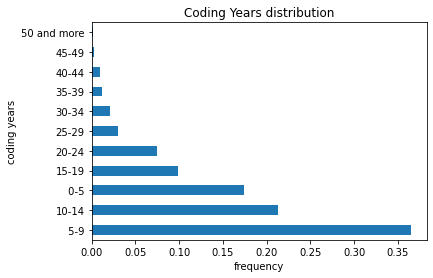

,count
coding years,
5-9,0.364344
10-14,0.212947
0-5,0.174390
15-19,0.098337
20-24,0.074637
25-29,0.029713
30-34,0.020870
35-39,0.012027
40-44,0.009551


In [37]:
coding_grouping(df_woman_pro, 'YearsCode')